In [1]:
import pandas as pd
import analysis_toolbox as at
platform = 'FOK!'

#print('Total comments',len(df_comments))

C:\Users\kpale\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def get_not_labeled_toxicity(df_comments):
    return len(pd.isna(df_comments[df_comments['Toxicity']]))

def get_label_of_group(df_comments,label):
    if df_comments.empty:
        return 0
    else:
        return df_comments['Toxicity'].value_counts(normalize=True)[label]

def get_gropus_by_label(dfs_comments,label):
    return [get_label_of_group(dfs_comments[type],label) for type in dfs_comments]

def get_df_toxicity(platform):
    dfs_comments = {}
    n_toxicity = {}
    for type in at.types:
        if type != 'closeness' or platform != 'Kindertelefoon':
            df_comments, _ = at.get_comments(platform,type)
            dfs_comments[type] = df_comments[df_comments['Toxicity'].notna()]
        else:
            dfs_comments[type] = pd.DataFrame()
    df_comments, _ = at.get_comments(platform)
    dfs_comments['Total'] = df_comments[df_comments['Toxicity'].notna()]
    for label in [0,1,2,3]:
        key = 'LABEL_'+str(label)
        n_toxicity[key] = get_gropus_by_label(dfs_comments,key)
    return n_toxicity

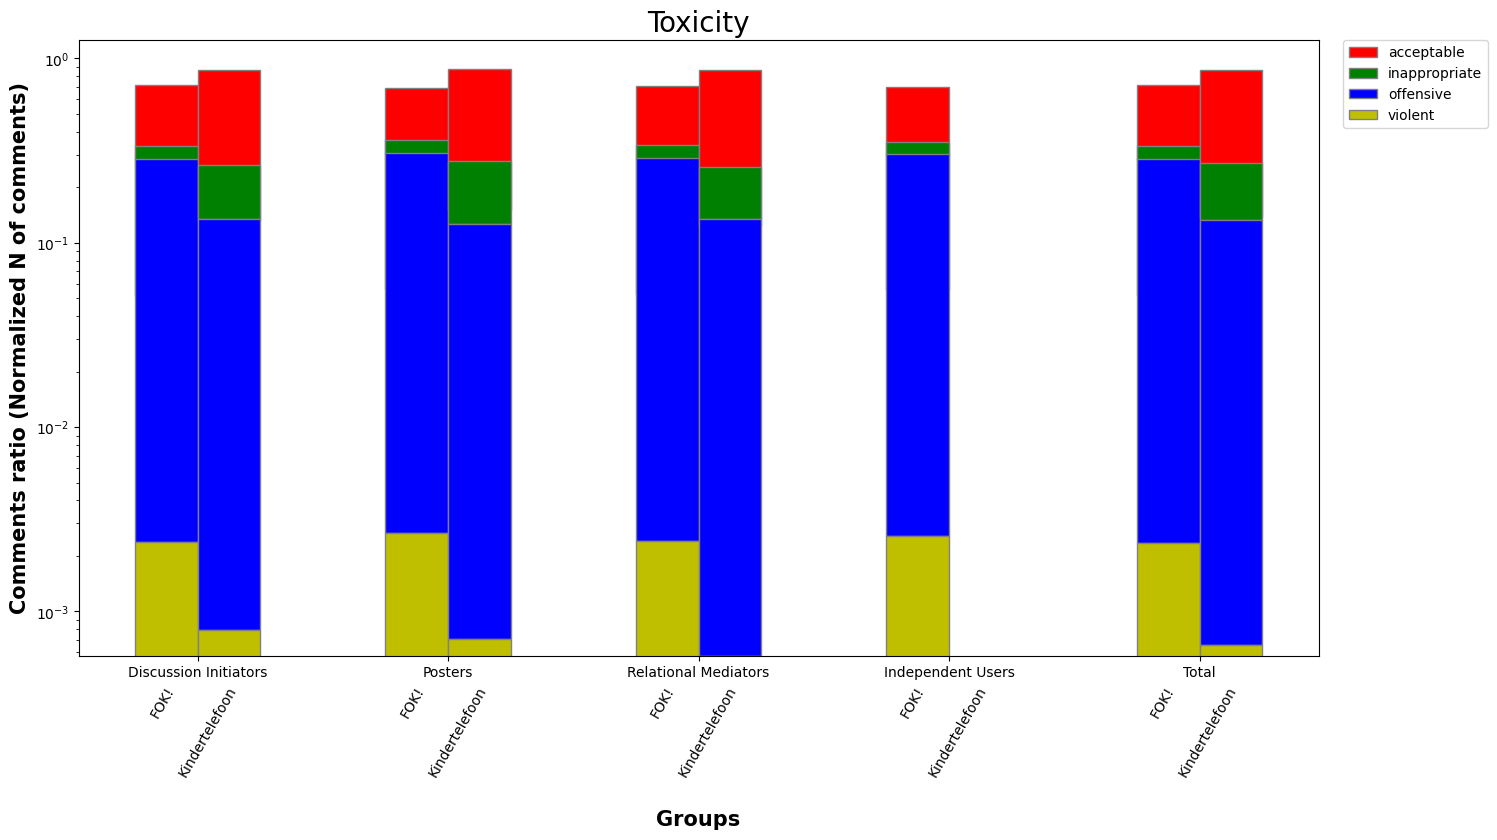

In [3]:
import numpy as np
import matplotlib.pyplot as plt
 
def build_bars(br,toxicity, label=True):
        # Make the plot
        if label:
            plt.bar(br, toxicity['LABEL_0'], color ='r', width = barWidth, 
                            edgecolor ='grey', label ='acceptable', bottom=toxicity['LABEL_1'])
            plt.bar(br, toxicity['LABEL_1'], color ='g', width = barWidth,
                            edgecolor ='grey', label ='inappropriate', bottom=toxicity['LABEL_2'])
            plt.bar(br, toxicity['LABEL_2'], color ='b', width = barWidth,
                            edgecolor ='grey', label ='offensive', bottom=toxicity['LABEL_3'])
            plt.bar(br, toxicity['LABEL_3'], color ='y', width = barWidth,
                            edgecolor ='grey', label ='violent') 
        else:
            plt.bar(br, toxicity['LABEL_0'], color ='r', width = barWidth,
                            edgecolor ='grey', bottom=toxicity['LABEL_1'])
            plt.bar(br, toxicity['LABEL_1'], color ='g', width = barWidth,
                            edgecolor ='grey', bottom=toxicity['LABEL_2'])
            plt.bar(br, toxicity['LABEL_2'], color ='b', width = barWidth,
                            edgecolor ='grey', bottom=toxicity['LABEL_3'])
            plt.bar(br, toxicity['LABEL_3'], color ='y', width = barWidth,
                            edgecolor ='grey', ) 

# set width of bar
barWidth = 0.25 
fig,ax = plt.subplots(figsize =(16, 8))


 
# set height of bar
n_toxicity_fok = get_df_toxicity('FOK!')
n_toxicity_kt = get_df_toxicity('Kindertelefoon')
# for key in n_toxicity_kt:
#     n_toxicity_kt[key].append(0)
 
# Set position of bar on X axis
br_fok = np.arange(len(n_toxicity_fok['LABEL_0']))
br_kt = [x + barWidth for x in br_fok]

build_bars(br_fok,n_toxicity_fok)
build_bars(br_kt,n_toxicity_kt,False)

ax.xaxis.set_label_coords(0, -.25)

# Adding Xticks
plt.xlabel('Groups', fontweight ='bold', fontsize = 15,)
plt.ylabel('Comments ratio (Normalized N of comments)', fontweight ='bold', fontsize = 15)
#ax.set_xticklabels(['DI', 'IE', 'RM', 'I'], rotation=0)
plt.xticks([r + barWidth/2 for r in range(len(n_toxicity_fok['LABEL_0']))],
        ['Discussion Initiators', 'Posters', 'Relational Mediators', 'Independent Users', 'Total'])
        
x_fok = 50
add_within_bar = 20
add_outside_bar = 180
for i in range(0,5):
    plt.annotate('FOK!', (0,-0), (x_fok, -20), xycoords='axes fraction', textcoords='offset points', va='top', rotation=60)
    plt.annotate('Kindertelefoon', (0,0), (x_fok + add_within_bar, -20), xycoords='axes fraction', textcoords='offset points', va='top', rotation=60)
    x_fok = x_fok + add_outside_bar


plt.title('Toxicity',{'fontsize': 20})

plt.yscale("log")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [4]:
n_toxicity_fok

{'LABEL_0': [0.663695662998556,
  0.6382636655948553,
  0.6586704371165644,
  0.6434139289662405,
  0.6633619775955126],
 'LABEL_1': [0.05168550515361251,
  0.05627009646302251,
  0.05267446319018405,
  0.05524533008305224,
  0.052065158902277954],
 'LABEL_2': [0.282245348470514,
  0.30281000978610373,
  0.2862346625766871,
  0.29876130275801466,
  0.2822084889200515],
 'LABEL_3': [0.002373483377317466,
  0.002656228156018454,
  0.002420437116564417,
  0.0025794381926925367,
  0.00236437458215794]}

In [5]:
n_toxicity_kt

{'LABEL_0': [0.7344147303814117,
  0.7230516045609499,
  0.7405498281786942,
  0,
  0.727579627183326],
 'LABEL_1': [0.13073213502849626,
  0.1501116727400964,
  0.12409316533027873,
  0,
  0.13885219433436077],
 'LABEL_2': [0.13406400701446733,
  0.12613142118255555,
  0.13478426880488736,
  0,
  0.1329076765008073],
 'LABEL_3': [0.000789127575624726,
  0.0007053015163982603,
  0.000572737686139748,
  0,
  0.0006605019815059445]}

In [6]:
at.get_comments('Kindertelefoon')[1]['Toxicity'].value_counts(normalize=True)

LABEL_0    0.672181
LABEL_2    0.198929
LABEL_1    0.128280
LABEL_3    0.000610
Name: Toxicity, dtype: float64

In [7]:
at.get_comments('FOK!')[1]['Toxicity'].value_counts(normalize=True)

LABEL_0    0.663362
LABEL_2    0.282208
LABEL_1    0.052065
LABEL_3    0.002364
Name: Toxicity, dtype: float64